# **Revisited Project EDA**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':18})

In [2]:
import pyspark as ps
import pandas as pd
from pyspark.sql.functions import lit

In [3]:
# look at df created with spark importer

df = pd.read_csv('../data/2020-08-11_all.csv', lineterminator='\n')
df.head()

,Unnamed: 0,tweet_id,state,search_term_key,tweet_time,tweet_text,tweet_text_range,source,user_id,user_date_created,location,description,user_verified
0,0,1246830993903955968,AR,@joebiden,Sun Apr 05 16:04:08 +0000 2020,"lil pump really said ""look at my wrist corona ...",NaN,"<a href=""http://twitter.com/download/android"" ...",29214401,Mon Apr 06 14:53:51 +0000 2009,NaN,The son of Rage and Love,False
1,1,1246830994537222144,AR,@joebiden,Sun Apr 05 16:04:08 +0000 2020,@Stephan59177054 @NomikiKonst @JoeBiden I thou...,"[40, 126]","<a href=""http://twitter.com/download/android"" ...",4766479674,Sat Jan 16 04:42:14 +0000 2016,"geohell, disneyworld",i'm a fully automated toilet,False
2,2,1246830995132813312,AR,@joebiden,Sun Apr 05 16:04:08 +0000 2020,RT @Jali_Cat: Yet you’ve been in office since ...,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",3166145611,Tue Apr 21 02:02:20 +0000 2015,NaN,Trump supporter! I follow back all Patriots. ...,False
3,3,1246830995761963008,AR,@joebiden,Sun Apr 05 16:04:09 +0000 2020,@JoeBiden This is a better message and more co...,"[10, 87]","<a href=""http://twitter.com/#!/download/ipad"" ...",2868989345,Sun Nov 09 14:12:09 +0000 2014,"North Huntingdon, PA",NaN,False
4,4,1246830995795369984,AR,@joebiden,Sun Apr 05 16:04:09 +0000 2020,RT @KaivanShroff: “I think it’s close to crimi...,NaN,"<a href=""http://twitter.com/download/iphone"" r...",91865200,Sun Nov 22 20:47:43 +0000 2009,Colorado,#the Resistance🇱🇷,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117761 entries, 0 to 117760
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Unnamed: 0         117761 non-null  int64 
 1   tweet_id           117761 non-null  int64 
 2   state              117761 non-null  object
 3   search_term_key    117761 non-null  object
 4   tweet_time         117761 non-null  object
 5   tweet_text         117761 non-null  object
 6   tweet_text_range   45465 non-null   object
 7   source             117761 non-null  object
 8   user_id            117761 non-null  int64 
 9   user_date_created  117761 non-null  object
 10  location           86039 non-null   object
 11  description        100013 non-null  object
 12  user_verified      117761 non-null  bool  
dtypes: bool(1), int64(3), object(9)
memory usage: 10.9+ MB


In [5]:
df = df.drop('Unnamed: 0', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117761 entries, 0 to 117760
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   tweet_id           117761 non-null  int64 
 1   state              117761 non-null  object
 2   search_term_key    117761 non-null  object
 3   tweet_time         117761 non-null  object
 4   tweet_text         117761 non-null  object
 5   tweet_text_range   45465 non-null   object
 6   source             117761 non-null  object
 7   user_id            117761 non-null  int64 
 8   user_date_created  117761 non-null  object
 9   location           86039 non-null   object
 10  description        100013 non-null  object
 11  user_verified      117761 non-null  bool  
dtypes: bool(1), int64(2), object(9)
memory usage: 10.0+ MB


In [6]:
df = df.drop_duplicates(subset='tweet_id', ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117652 entries, 0 to 117651
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   tweet_id           117652 non-null  int64 
 1   state              117652 non-null  object
 2   search_term_key    117652 non-null  object
 3   tweet_time         117652 non-null  object
 4   tweet_text         117652 non-null  object
 5   tweet_text_range   45427 non-null   object
 6   source             117652 non-null  object
 7   user_id            117652 non-null  int64 
 8   user_date_created  117652 non-null  object
 9   location           85966 non-null   object
 10  description        99927 non-null   object
 11  user_verified      117652 non-null  bool  
dtypes: bool(1), int64(2), object(9)
memory usage: 10.0+ MB


In [7]:
df_sorted = df.sort_values(by='tweet_id', ignore_index=True)

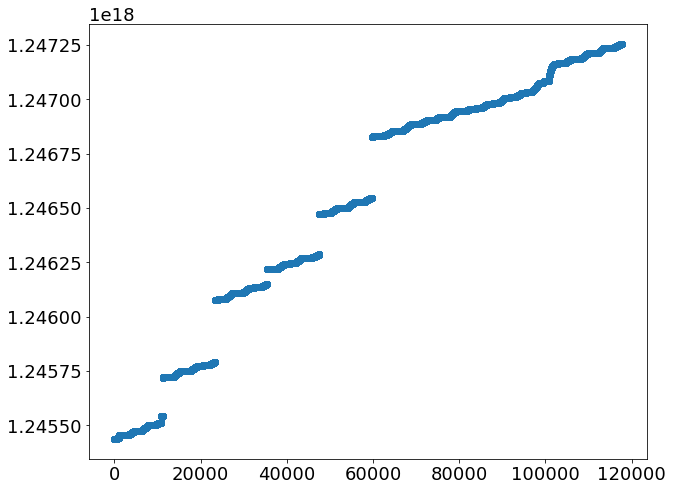

In [8]:
fig, ax = plt.subplots(figsize=(10,8))

ax.scatter(df_sorted.index, df_sorted.tweet_id)

In [9]:
df_sorted.tweet_id.unique().shape[0]

117652

In [10]:
df_sorted.tweet_id.shape[0]

117652

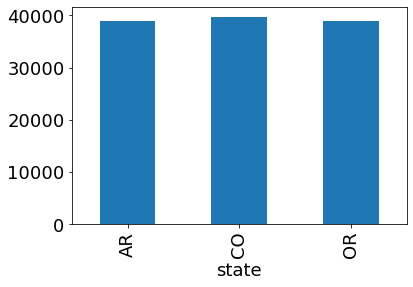

In [11]:
# lets check state classification balance

df.groupby('state').count()['tweet_id'].plot(kind='bar')
plt.show()

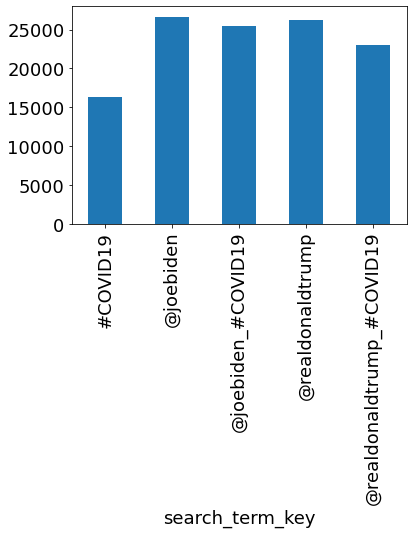

In [12]:
df.groupby('search_term_key').count()['tweet_id'].plot(kind='bar')
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117652 entries, 0 to 117651
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   tweet_id           117652 non-null  int64 
 1   state              117652 non-null  object
 2   search_term_key    117652 non-null  object
 3   tweet_time         117652 non-null  object
 4   tweet_text         117652 non-null  object
 5   tweet_text_range   45427 non-null   object
 6   source             117652 non-null  object
 7   user_id            117652 non-null  int64 
 8   user_date_created  117652 non-null  object
 9   location           85966 non-null   object
 10  description        99927 non-null   object
 11  user_verified      117652 non-null  bool  
dtypes: bool(1), int64(2), object(9)
memory usage: 10.0+ MB


In [14]:
from bs4 import BeautifulSoup


In [18]:
# remove tags from tweet text

def format_range(raw_text):
    if type(raw_text) == str: 
        start, end = ''.join([char for char in raw_text if char not in ['[', ',', ']']]).split(' ')
        return (int(start), int(end))
    else:
        return raw_text

In [19]:
df['text_text_range_as_tup'] = df['tweet_text_range'].apply(format_range)

In [20]:
def no_mentions_text(tup_range_series, raw_tweet_text_series):
    wo_mentions = np.empty(raw_tweet_text_series.shape, dtype='U256')
    for idx, tup in enumerate(tup_range_series):
        if type(tup) == tuple:
            wo_mentions[idx] = raw_tweet_text_series[idx][tup[0]:tup[1]]
        else:
            wo_mentions[idx] = raw_tweet_text_series[idx]
    return wo_mentions

In [21]:
df['wo_mentions'] = no_mentions_text(df['text_text_range_as_tup'], df['tweet_text'])

In [22]:
df.iloc[190:195]

,tweet_id,state,search_term_key,tweet_time,tweet_text,tweet_text_range,source,user_id,user_date_created,location,description,user_verified,text_text_range_as_tup,wo_mentions
190,1246946726595960837,AR,@joebiden,Sun Apr 05 23:44:01 +0000 2020,@FamishedCreator @BenSpielberg @JoeBiden @TomP...,"[51, 116]","<a href=""https://mobile.twitter.com"" rel=""nofo...",925241884313837569,Tue Oct 31 06:03:50 +0000 2017,Sunnyvale Trailer Park,"Free snark, Free answers to plumbing questions...",False,"(51, 116)",Id like to see @TomPerez wiping down the votin...
191,1246946727363514379,AR,@joebiden,Sun Apr 05 23:44:01 +0000 2020,"Let me ask you something @amyklobuchar, @PeteB...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",490076756,Sun Feb 12 06:04:45 +0000 2012,Minnesota,A stranger in a strange land. Fuck your presid...,False,NaN,"Let me ask you something @amyklobuchar, @PeteB..."
192,1246946727896272896,AR,@joebiden,Sun Apr 05 23:44:01 +0000 2020,Bruh I get so tired of u broke ass niggas stea...,NaN,"<a href=""http://twitter.com/download/iphone"" r...",1229960245381865473,Wed Feb 19 02:45:58 +0000 2020,austin houston,🇯🇲 ♎︎ ☉ ♎︎ ☾ ♎︎⇡robyen ⚢ 21. sc: hippigale,False,NaN,Bruh I get so tired of u broke ass niggas stea...
193,1246946728575672320,AR,@joebiden,Sun Apr 05 23:44:01 +0000 2020,"@JoeBiden Joe, what is Namenda?","[10, 31]","<a href=""http://twitter.com/download/android"" ...",452669003,Mon Jan 02 03:41:14 +0000 2012,"Tyler, TX",NaN,False,"(10, 31)","Joe, what is Namenda?"
194,1246946729129320449,AR,@joebiden,Sun Apr 05 23:44:02 +0000 2020,@ScottPresler @JoeBiden @DrBiden I know so man...,"[33, 140]","<a href=""http://twitter.com/download/android"" ...",244674034,Sat Jan 29 21:34:34 +0000 2011,New Hampshire,"Proud American,Italian heritage, supporter of...",False,"(33, 140)",I know so many fathers that if it was their da...


In [23]:
source = df['source']
source

0         <a href="http://twitter.com/download/android" ...
1         <a href="http://twitter.com/download/android" ...
2         <a href="https://mobile.twitter.com" rel="nofo...
3         <a href="http://twitter.com/#!/download/ipad" ...
4         <a href="http://twitter.com/download/iphone" r...
                                ...                        
117647    <a href="http://twitter.com/download/iphone" r...
117648    <a href="http://twitter.com/download/android" ...
117649    <a href="http://twitter.com/download/iphone" r...
117650    <a href="https://mobile.twitter.com" rel="nofo...
117651    <a href="http://twitter.com/download/android" ...
Name: source, Length: 117652, dtype: object

In [26]:
BeautifulSoup(source[0]).find('a').getText()

'Twitter for Android'

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117652 entries, 0 to 117651
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   tweet_id                117652 non-null  int64 
 1   state                   117652 non-null  object
 2   search_term_key         117652 non-null  object
 3   tweet_time              117652 non-null  object
 4   tweet_text              117652 non-null  object
 5   tweet_text_range        45427 non-null   object
 6   source                  117652 non-null  object
 7   user_id                 117652 non-null  int64 
 8   user_date_created       117652 non-null  object
 9   location                85966 non-null   object
 10  description             99927 non-null   object
 11  user_verified           117652 non-null  bool  
 12  text_text_range_as_tup  45427 non-null   object
 13  wo_mentions             117652 non-null  object
dtypes: bool(1), int64(2), object(11)
mem

In [24]:
date_cols = ['tweet_date_created', 'user_date_created']
df_clean = pd.read_csv('../data/2020-08-11_all_clean.csv', lineterminator='\n', parse_dates=date_cols, infer_datetime_format=True)

In [25]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117652 entries, 0 to 117651
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   tweet_id                117652 non-null  int64              
 1   state                   117652 non-null  object             
 2   search_term_key         117652 non-null  object             
 3   tweet_date_created      117652 non-null  datetime64[ns, UTC]
 4   user_id                 117652 non-null  int64              
 5   user_date_created       117652 non-null  datetime64[ns, UTC]
 6   location                85966 non-null   object             
 7   description             99927 non-null   object             
 8   user_verified           117652 non-null  bool               
 9   tweet_text_wo_mentions  117652 non-null  object             
 10  source_text             117652 non-null  object             
dtypes: bool(1), datetime64[ns,

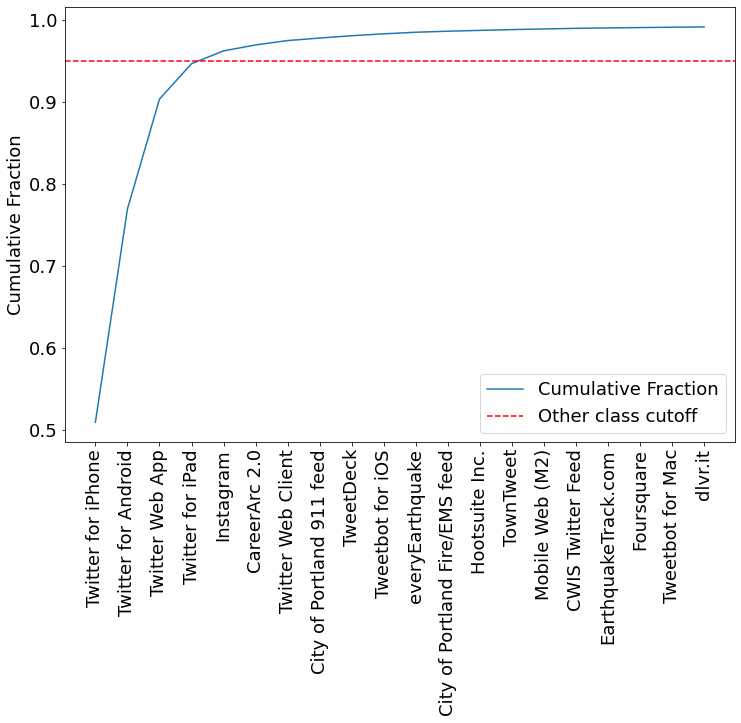

In [58]:
df_bysource = df_clean.groupby('source_text').count().sort_values('state', ascending=False)
vals = df_bysource.values[:,1]
scaled_vals = vals/np.sum(vals)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(df_bysource.index[:20], np.cumsum(scaled_vals)[:20], label='Cumulative Fraction')
ax.set_xticklabels(df_bysource.index[:20], rotation=90)
ax.axhline(0.95, label='Other class cutoff', ls='--', c='r')
ax.legend()
ax.set_ylabel('Cumulative Fraction')
plt.show()

In [61]:
# iPhone, Android, Web App, iPad and Other 

source_class_dict = {'Twitter for iPhone': 'iPhone', 'Twitter for Android': 'Android',
                     'Twitter Web App': 'Web', 'Twitter for iPad': 'iPad'}
df_clean['source_text'] = df_clean['source_text'].replace(source_class_dict)
df_clean['source_text'].unique()

array(['Android', 'Web', 'iPad', 'iPhone', 'TweetDeck', 'Buffer',
       'Twitter Web Client', 'Instagram', 'CareerArc 2.0',
       'CWIS Twitter Feed', 'Talon Android', 'Twitterrific for iOS',
       'bb2020', 'eat it app', 'Hootsuite Inc.', 'Trackalytics Tweeter',
       'Foursquare', 'Trump Retweet Bot', 'Оwly',
       'UberSocial for Android', 'Tweetbot for iΟS', 'Tweetbot for Mac',
       'NWSSevereTstorm', 'MeteoWare Plus+', 'TweetCaster for Android',
       'dlvr.it', 'I Just Want To Tweet', 'TheMindful', 'Nuzzel',
       'Twitter for Mac', 'CuratingDevList', 'Republican Tweets',
       'Echofon', 'Janetter Pro for Android', 'Untappd',
       'Foursquare Swarm', 'IWPTweets', 'SafeTweet by TweetMyJOBS',
       'CORE ListingMachine', 'iembot', 'Svr Wx Impact Graphics - EWX',
       'USGS Texas Rain', 'StormerSite', 'Endomondo', 'RedianDevBot',
       'Paper.li', 'SocialFlow', 'Sprout Social', 'IFTTT',
       'tiorradio2 publisher', 'Ted Wilson', 'Sprinklr', 'GaggleAMP',
       'Tw

In [80]:
df_clean['source_text'].where(df_clean['source_text'].apply(lambda x: x in source_class_dict.values()),'Other', inplace=True)

In [81]:
df_clean['source_text'].unique()

array(['Android', 'Web', 'iPad', 'iPhone', 'Other'], dtype=object)

In [73]:
df_clean.iloc[0]

tweet_id                                                1246830993903955968
state                                                                    AR
search_term_key                                                   @joebiden
tweet_date_created                                2020-04-05 16:04:08+00:00
user_id                                                            29214401
user_date_created                                 2009-04-06 14:53:51+00:00
location                                                                NaN
description                                        The son of Rage and Love
user_verified                                                         False
tweet_text_wo_mentions    lil pump really said "look at my wrist corona ...
source_text                                                         Android
Name: 0, dtype: object

In [82]:
df_clean.head()

,tweet_id,state,search_term_key,tweet_date_created,user_id,user_date_created,location,description,user_verified,tweet_text_wo_mentions,source_text
0,1246830993903955968,AR,@joebiden,2020-04-05 16:04:08+00:00,29214401,2009-04-06 14:53:51+00:00,NaN,The son of Rage and Love,False,"lil pump really said ""look at my wrist corona ...",Android
1,1246830994537222144,AR,@joebiden,2020-04-05 16:04:08+00:00,4766479674,2016-01-16 04:42:14+00:00,"geohell, disneyworld",i'm a fully automated toilet,False,@Stephan59177054 @NomikiKonst @JoeBiden I thou...,Android
2,1246830995132813312,AR,@joebiden,2020-04-05 16:04:08+00:00,3166145611,2015-04-21 02:02:20+00:00,NaN,Trump supporter! I follow back all Patriots. ...,False,RT @Jali_Cat: Yet you’ve been in office since ...,Web
3,1246830995761963008,AR,@joebiden,2020-04-05 16:04:09+00:00,2868989345,2014-11-09 14:12:09+00:00,"North Huntingdon, PA",NaN,False,@JoeBiden This is a better message and more co...,iPad
4,1246830995795369984,AR,@joebiden,2020-04-05 16:04:09+00:00,91865200,2009-11-22 20:47:43+00:00,Colorado,#the Resistance🇱🇷,False,RT @KaivanShroff: “I think it’s close to crimi...,iPhone


In [86]:
df_clean['description'].isnull().count()

117652

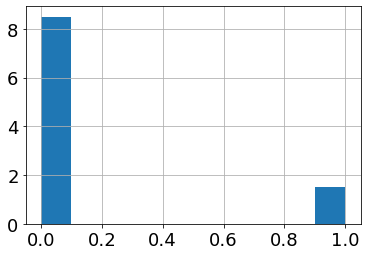

In [122]:
nans = df_clean['description'].apply(lambda x: type(x) == float).astype(int).hist(density=True)

In [117]:
nans/df_clean.shape[0]

0.0

In [84]:
df_clean.info()unique

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117652 entries, 0 to 117651
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   tweet_id                117652 non-null  int64              
 1   state                   117652 non-null  object             
 2   search_term_key         117652 non-null  object             
 3   tweet_date_created      117652 non-null  datetime64[ns, UTC]
 4   user_id                 117652 non-null  int64              
 5   user_date_created       117652 non-null  datetime64[ns, UTC]
 6   location                85966 non-null   object             
 7   description             99927 non-null   object             
 8   user_verified           117652 non-null  bool               
 9   tweet_text_wo_mentions  117652 non-null  object             
 10  source_text             117652 non-null  object             
dtypes: bool(1), datetime64[ns,